In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')
df.head(5)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df['Cancer Present'].value_counts()

0    1500
1    1500
Name: Cancer Present, dtype: int64

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

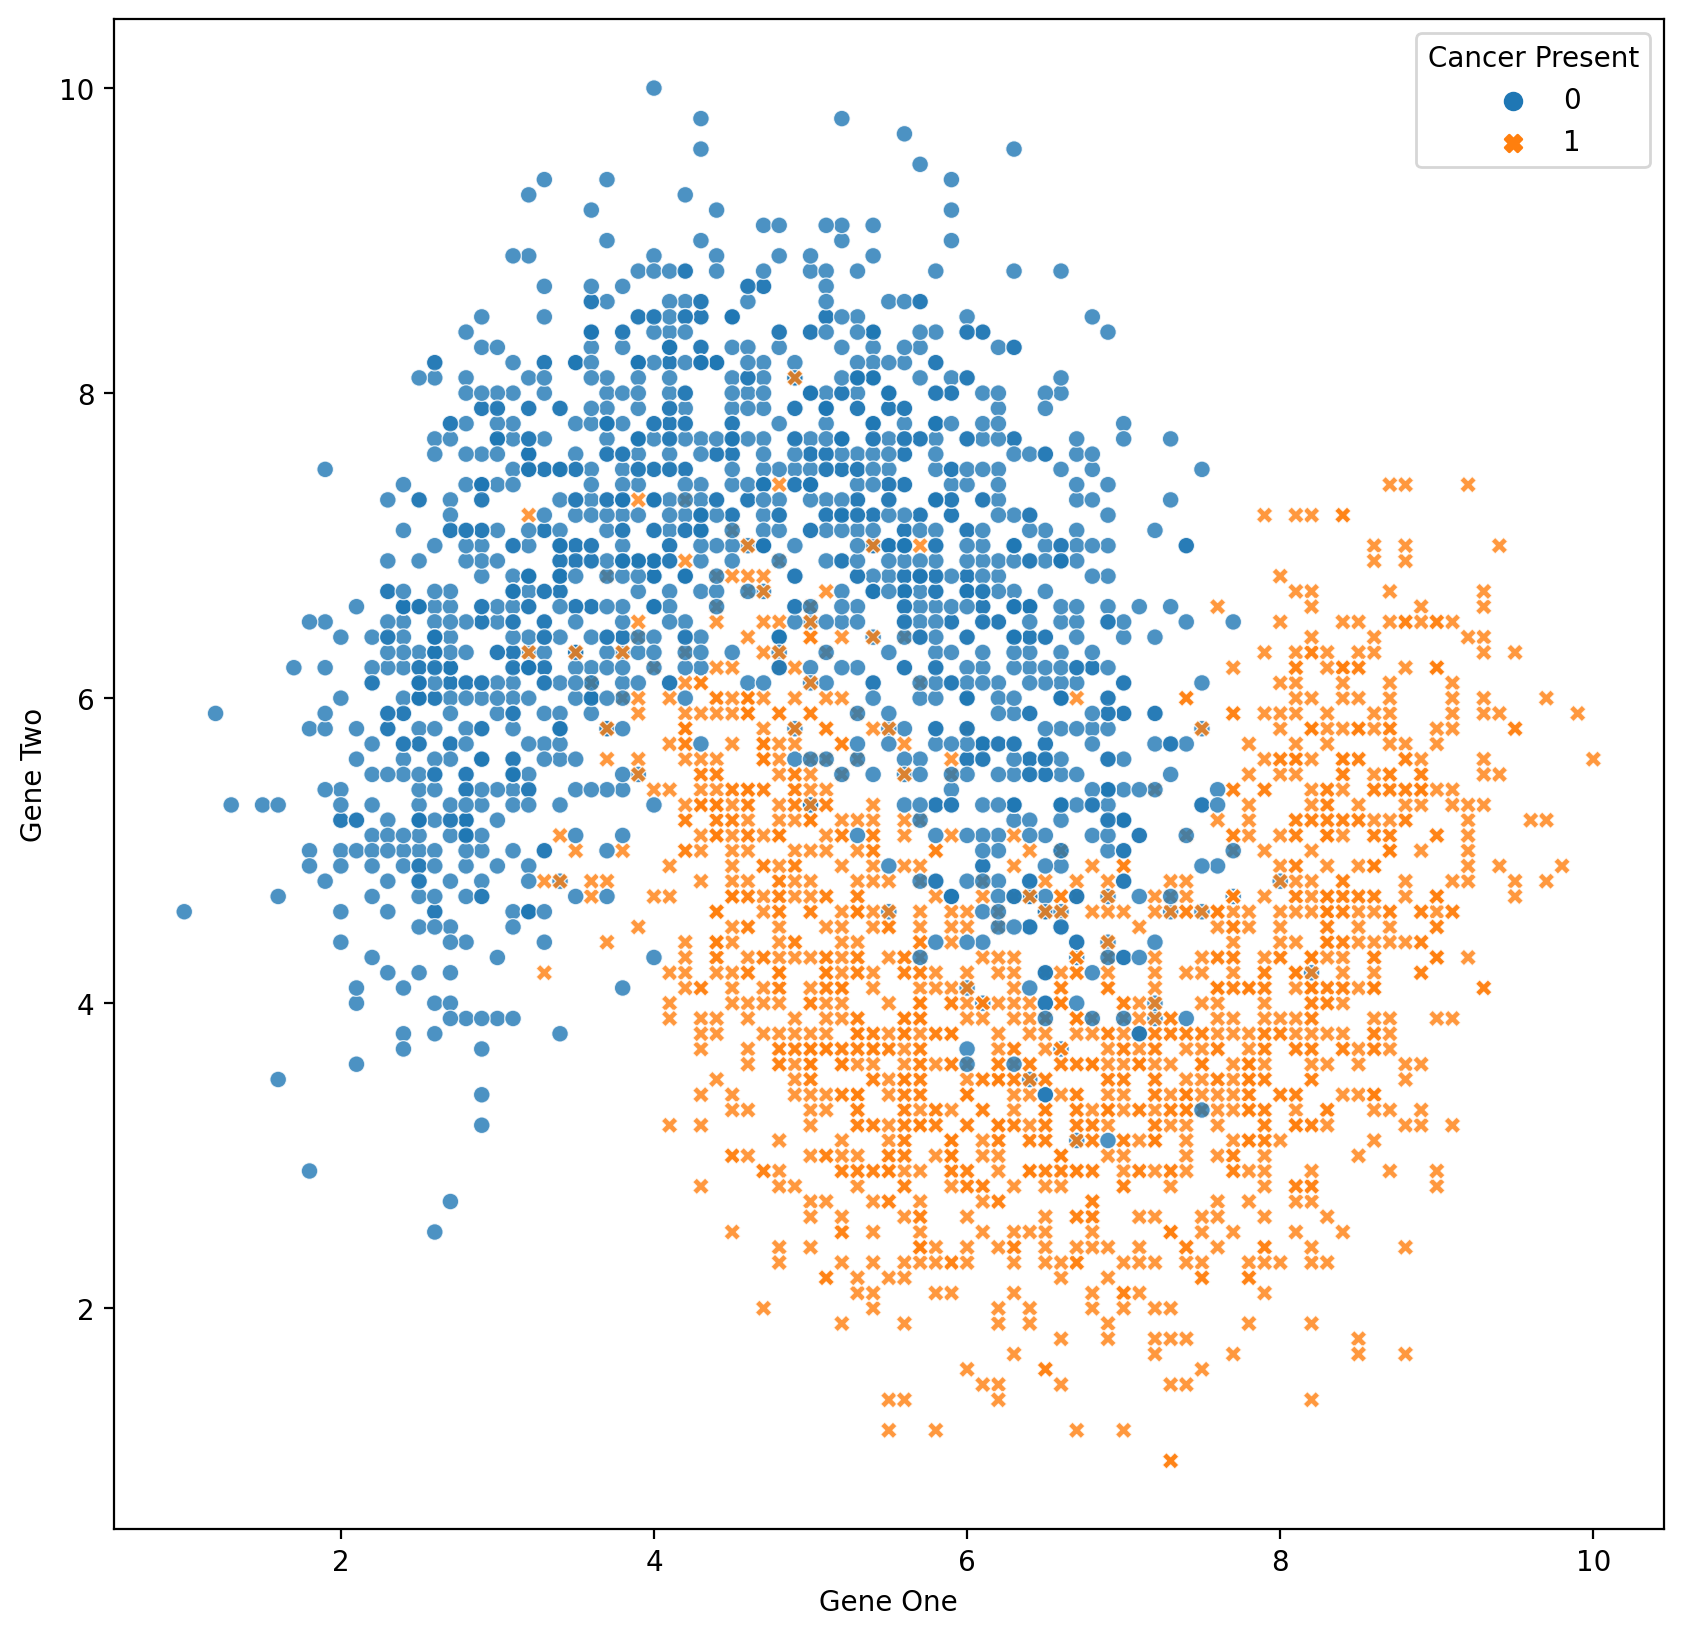

In [5]:
plt.figure(figsize=(10,10),dpi=200)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', style='Cancer Present', alpha=0.8)

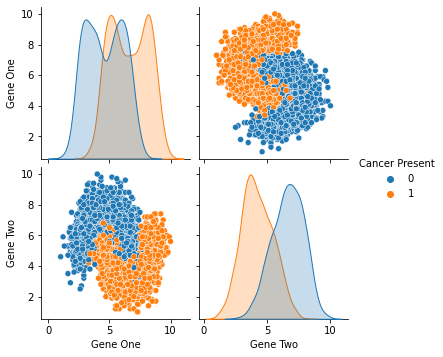

In [6]:
sns.pairplot(data=df, hue='Cancer Present')

In [7]:
# Model Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler=StandardScaler()
fitted_transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)

In [8]:
# Build the model
from sklearn.neighbors import KNeighborsClassifier

k_near_neighbor = KNeighborsClassifier(n_neighbors=1)
k_near_neighbor.fit(fitted_transformed_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
# Prediction and model evaluation
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

y_predicted = k_near_neighbor.predict(transformed_X_test)

confusion_matrix(y_test, y_predicted)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



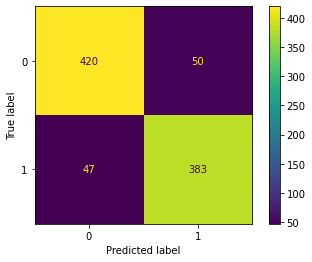

In [10]:
plot_confusion_matrix(k_near_neighbor, transformed_X_test, y_test)

Text(0.5, 0, 'K Value')

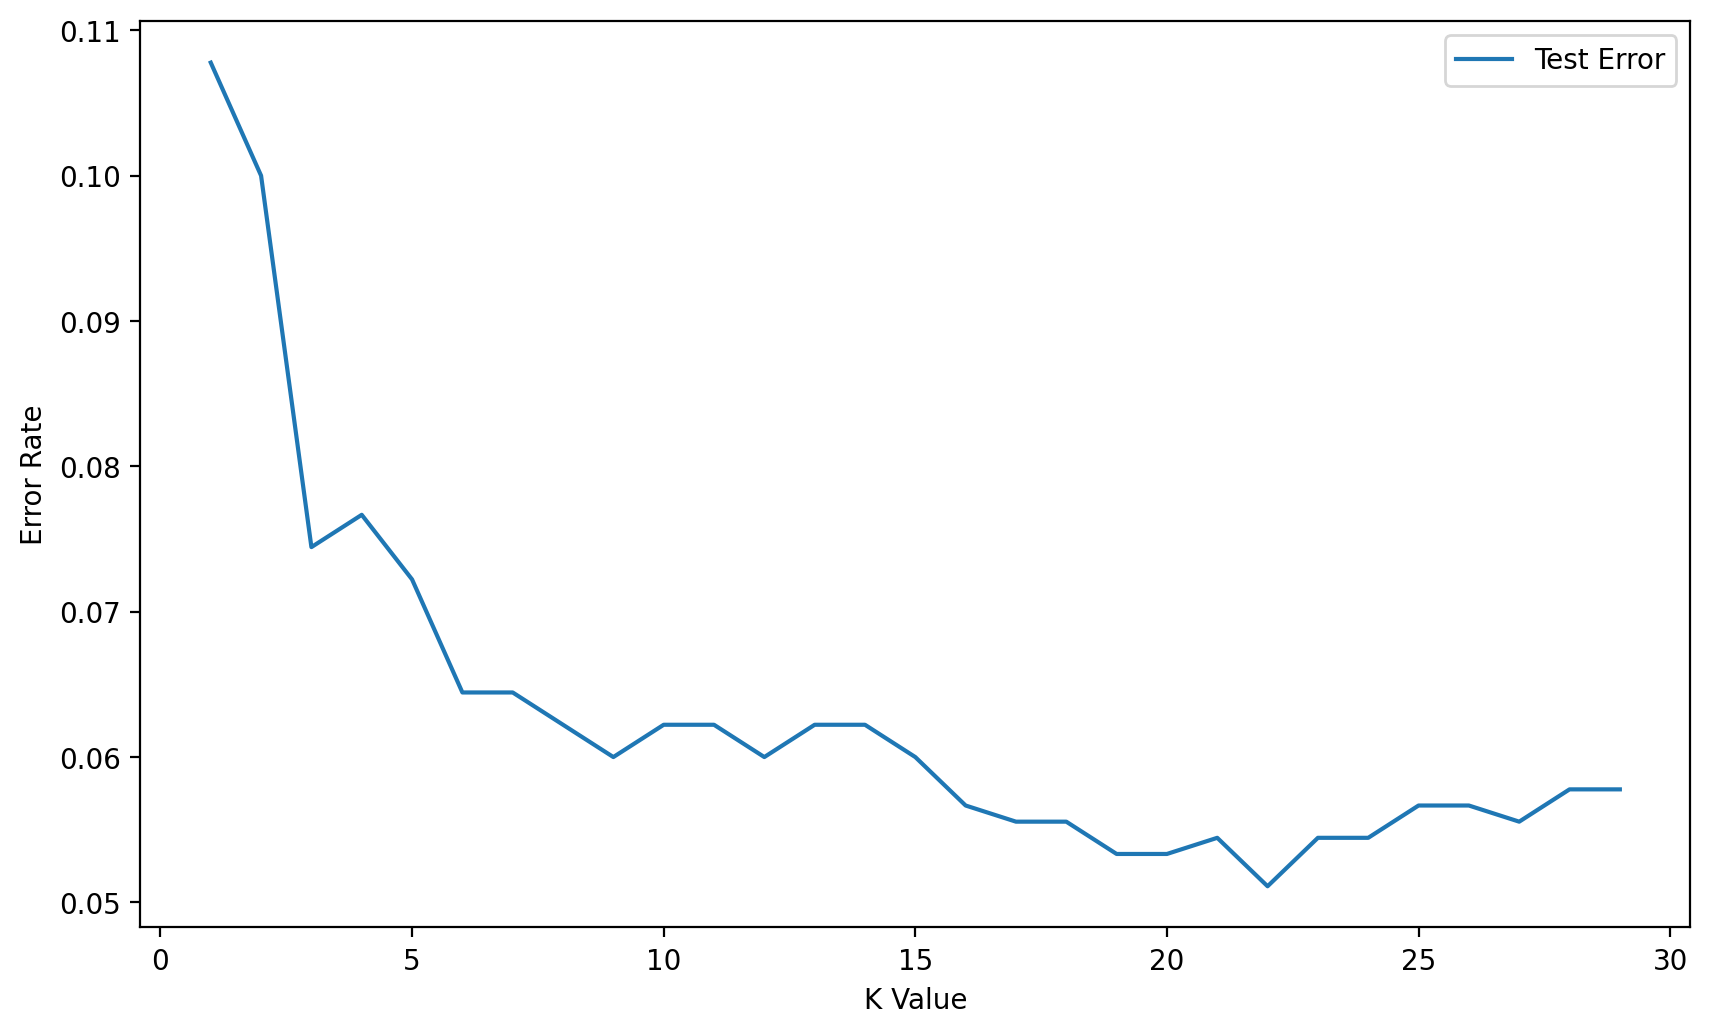

In [19]:
# Elbow Method
elbow_test_error_rate = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(fitted_transformed_X_train, y_train)
    
    y_elbow_predicted = knn.predict(transformed_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_elbow_predicted)
    elbow_test_error_rate.append(test_error)
    
plt.figure(figsize=(10,6),dpi=200)    
plt.plot(range(1,30), elbow_test_error_rate, label='Test Error')  
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [21]:
# Grid Search Model
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler', scaler), ('knn', knn)]

from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

from sklearn.model_selection import GridSearchCV
k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [26]:
# Results of the pipeline
full_cv_classifier.cv_results_['mean_test_score']


array([0.90238095, 0.90285714, 0.91857143, 0.91333333, 0.92380952,
       0.92142857, 0.9252381 , 0.9247619 , 0.9252381 , 0.92190476,
       0.9252381 , 0.9247619 , 0.92761905, 0.92904762, 0.92809524,
       0.92809524, 0.92904762, 0.92857143, 0.92761905])

In [27]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=14))])

In [28]:
# Conclusion
# Based on gridsearch, the best Knn model for this problem will be with n_neighbors = 14

scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scaler', scaler),('knn14', knn14)]
pipe = Pipeline(operations)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



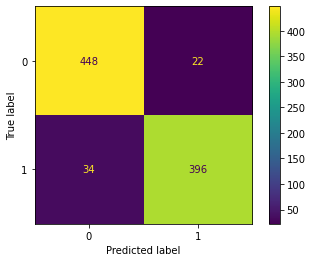

In [29]:
# Final model evaluation based on n_neighbors = 14
y_pipe_predicted = pipe.predict(X_test)

print(classification_report(y_test, y_pipe_predicted))
plot_confusion_matrix(pipe, X_test, y_test)